# Problem Statement

The goal is to predict the CHURN in the telecom industry. Create the best model which can predict customer swtiching to different telecom. The idea is to retent customer who are leaving by applying the retention stratergy.
This is the classification problem, model predicting whether customer is gonna churned or not.

# Data 

The customer churn data is given in the file data/raw.csv. The detailed explanation is as follows:

- **State**: The state where a customer comes from
- **Account length**: Number of days a customer has been using services
- **Area code**: The area where a customer comes from
- **Phone number**: The phone number of a customer
- **International plan**: The status of customer international plan
- **Voicemail plan**: The status of customer voicemail plan
- **No. vmail msgs**: Number of voicemail message sent by a customer
- **Total day minutes**: Total call minutes spent by a customer during day time
- **Total day calls**: Total number of calls made by a customer during day time
- **Total day charge**: Total amount charged to a customer during day time
- **Total eve minutes**: Total call minutes spent by a customer during evening time
- **Total eve calls**: Total number of calls made by a customer during evening time
- **Total eve charge**: Total amount charged to a customer during evening time
- **Total night minutes**: Total call minutes spent by a customer during night time
- **Total night calls**: Total number of calls made by a customer during night time
- **Total night charge**:Total amount charged to a customer during night time
- **Total intl minutes**: Total international call minutes spent by a customer
- **Total intl calls**: Total number of international calls made by a customer
- **Total int charge**: Total international call amount charged to a customer
- **Customer service calls**: Total number of customer service calls made by a customer
- **Churn**: Whether a customer is churned or not



# Evalution Metric

We will measure the accuracy, precision, f1 Score, recall of the model. we will more focus on getting the recall which is balance between recall and precision.

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/raw.csv")

# Intial Inspection

- check for missing values
- check for dupilcate values
- check outliers in the dataset
- check the dtype for all columns
- check imbalance in the dataset

In [3]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
df.sample(10).T

765       1818      325       1340      2729  \
state                         CA        DE        ME        HI        WY   
account length               113        78       100       190       122   
area code                    415       408       510       408       415   
phone number            370-2892  328-9006  359-8466  380-1096  357-7385   
international plan            no        no        no        no        no   
voice mail plan               no        no       yes        no        no   
number vmail messages          0         0        30         0         0   
total day minutes          187.6     139.2      58.8     150.9     119.3   
total day calls               97       140       104        86        93   
total day charge           31.89     23.66      10.0     25.65     20.28   
total eve minutes          208.2     191.4     219.5     268.6     223.9   
total eve calls              118       113       107       129       103   
total eve charge            17.7     16.27     18.66     22.83     19.03   
total night minutes        158.9     286.5     152.3     179.9     211.9   
total night calls            101       125       118        73       122   
total night charge          7.15     12.89      6.85       8.1      9.54   
total intl minutes           8.7      11.8       7.1      14.7       8.7   
total intl calls               6         3         3         1         4   
total intl charge           2.35      3.19      1.92      3.97      2.35   
customer service calls         2         3         0         1         2   
churn                      False     False     False     False     False   

                            1129      1105      1064      2341      1678  
state                         AL        NJ        WY        LA        VT  
account length                71       135       185        40        64  
area code                    415       510       415       510       408  
phone number            362-7835  401-8735  405-7904  367-9257  349-2157  
international plan            no        no       yes        no        no  
voice mail plan               no       yes       yes        no        no  
number vmail messages          0        28        30         0         0  
total day minutes          103.3     201.4     154.1     109.4     145.5  
total day calls              103       100       114       107       116  
total day charge           17.56     34.24      26.2      18.6     24.74  
total eve minutes          138.5     246.5     118.7     244.7     228.4  
total eve calls               79       117       106       102       110  
total eve charge           11.77     20.95     10.09      20.8     19.41  
total night minutes        164.8     154.8     258.4     276.9     273.4  
total night calls             98       131       105       123        91  
total night charge          7.42      6.97     11.63     12.46      12.3  
total intl minutes           9.0      12.9      12.9       7.1       8.9  
total intl calls               2         4         3         7         8  
total intl charge           2.43      3.48      3.48      1.92       2.4  
customer service calls         2         2         2         0         1  
churn                      False      True     False     False     False

In [5]:
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Check for nan

In [7]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### check for duplication

In [8]:
print(df.duplicated().sum())

0


### check unique values for columns

In [9]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Statistics


In [10]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [11]:
df.describe(include="object")

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

### Check for the outlier

In [12]:
def check_outlier_IQR(data):
    '''
    this function check for the no. of outliers for all the numberic column in dataset
    '''
    numberic_column = data.select_dtypes(include='number').columns
    outlier_count = {}

    for col in numberic_column:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_wisker = Q3 + (1.5 * IQR)
        lower_wisker = Q1 - (1.5 * IQR)
        no_outliers = data[(data[col] > upper_wisker) | (data[col] < lower_wisker)][col].count()

        outlier_count[col] = no_outliers
    
    return outlier_count

In [13]:
outlier_count = check_outlier_IQR(df)
df_outlier_count = pd.DataFrame(list(outlier_count.items()), columns=["columns", "number_of_outliers"])
df_outlier_count

columns  number_of_outliers
0           account length                  18
1                area code                   0
2    number vmail messages                   1
3        total day minutes                  25
4          total day calls                  23
5         total day charge                  25
6        total eve minutes                  24
7          total eve calls                  20
8         total eve charge                  24
9      total night minutes                  30
10       total night calls                  22
11      total night charge                  30
12      total intl minutes                  46
13        total intl calls                  78
14       total intl charge                  49
15  customer service calls                 267

### Check for the Imbalance 


In [14]:
churn_value_count = df["churn"].value_counts().reset_index()
churn_value_count["Weightage"] = churn_value_count["count"] / df.shape[0]
churn_value_count

churn  count  Weightage
0  False   2850   0.855086
1   True    483   0.144914

### Conlusion - initial inpection

From the initial inpection, we can conlude that:

- There are 3333 rows and total 21 columns in the dataset
- Out of 3333, 3010 do not have International plan: 90.30%
- Out of 3333, 2411 do not have Voice mail plan: 72.33%
- The dataset is highly imbalance, 85.5% customer didn't churn whearas 14.5% did. 
- A lot of columns has ouliter, we need to deal with that, as outlier baised the result and perform poorly in genrealization and overtfit the model


# Data Preprocessing 

- deal with missing Values and duplicates - there aren't any missing values niether dulpicates
- Data type correction
- Drop phone number (doen't add any values in predicting chrun)

In [15]:
# Data type correction
df["area code"] = df["area code"].astype("object")
df.describe(include="object")

state  area code phone number international plan voice mail plan
count   3333       3333         3333               3333            3333
unique    51          3         3333                  2               2
top       WV        415     382-4657                 no              no
freq     106       1655            1               3010            2411

- Area code is now and categorical column
- Around 50 percent customer is from '415' area code 

In [16]:
# drop phone number
df.drop(columns=["phone number"], inplace=True)
df.shape

(3333, 20)

# EDA 

- distribution of Categorical values 
- distribution of numberic columns
- correlation plots
- pairplot 
- Explore features with respect to target

In [ ]:
# Distribution of Area code, internation plan and voice mail plan
area_code_count = df["area code"].value_counts().reset_index()
international_count = df["international plan"].value_counts().reset_index()
voice_mail_count = df["voice mail plan"].value_counts().reset_index()

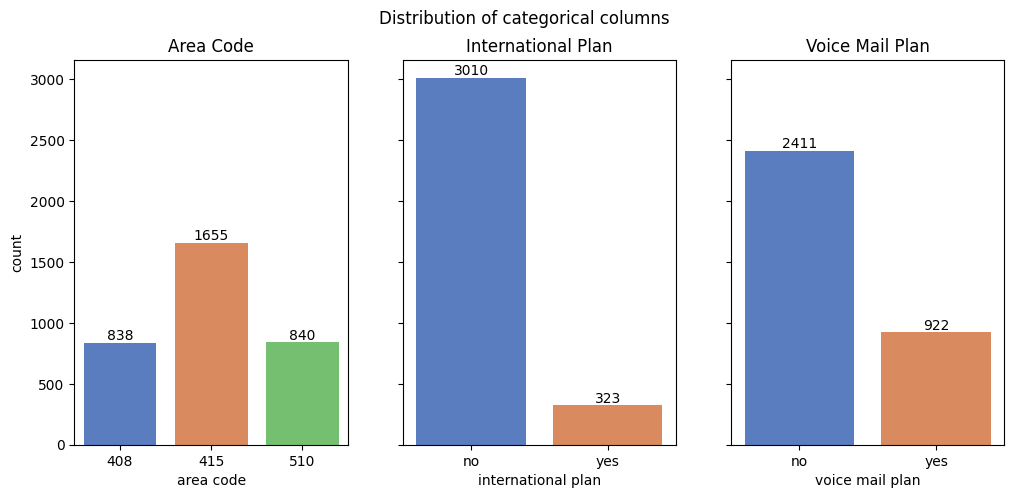

In [71]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 5), sharey=True)

area_code_plot = sns.barplot(data=area_code_count, x="area code", y="count", ax=axs[0], hue="area code", palette="muted", legend=False)
area_code_plot.set_title("Area Code")

international_plot = sns.barplot(data=international_count, x="international plan", y="count", ax=axs[1], hue="international plan", palette="muted")
international_plot.set_title("International Plan")

voice_mail_plot = sns.barplot(data=voice_mail_count, x="voice mail plan", y="count", ax=axs[2], hue="voice mail plan", palette="muted")
voice_mail_plot.set_title("Voice Mail Plan")

for ax in axs:
    for bars in ax.containers:
         ax.bar_label(bars)

plt.suptitle("Distribution of categorical columns")

plt.show()

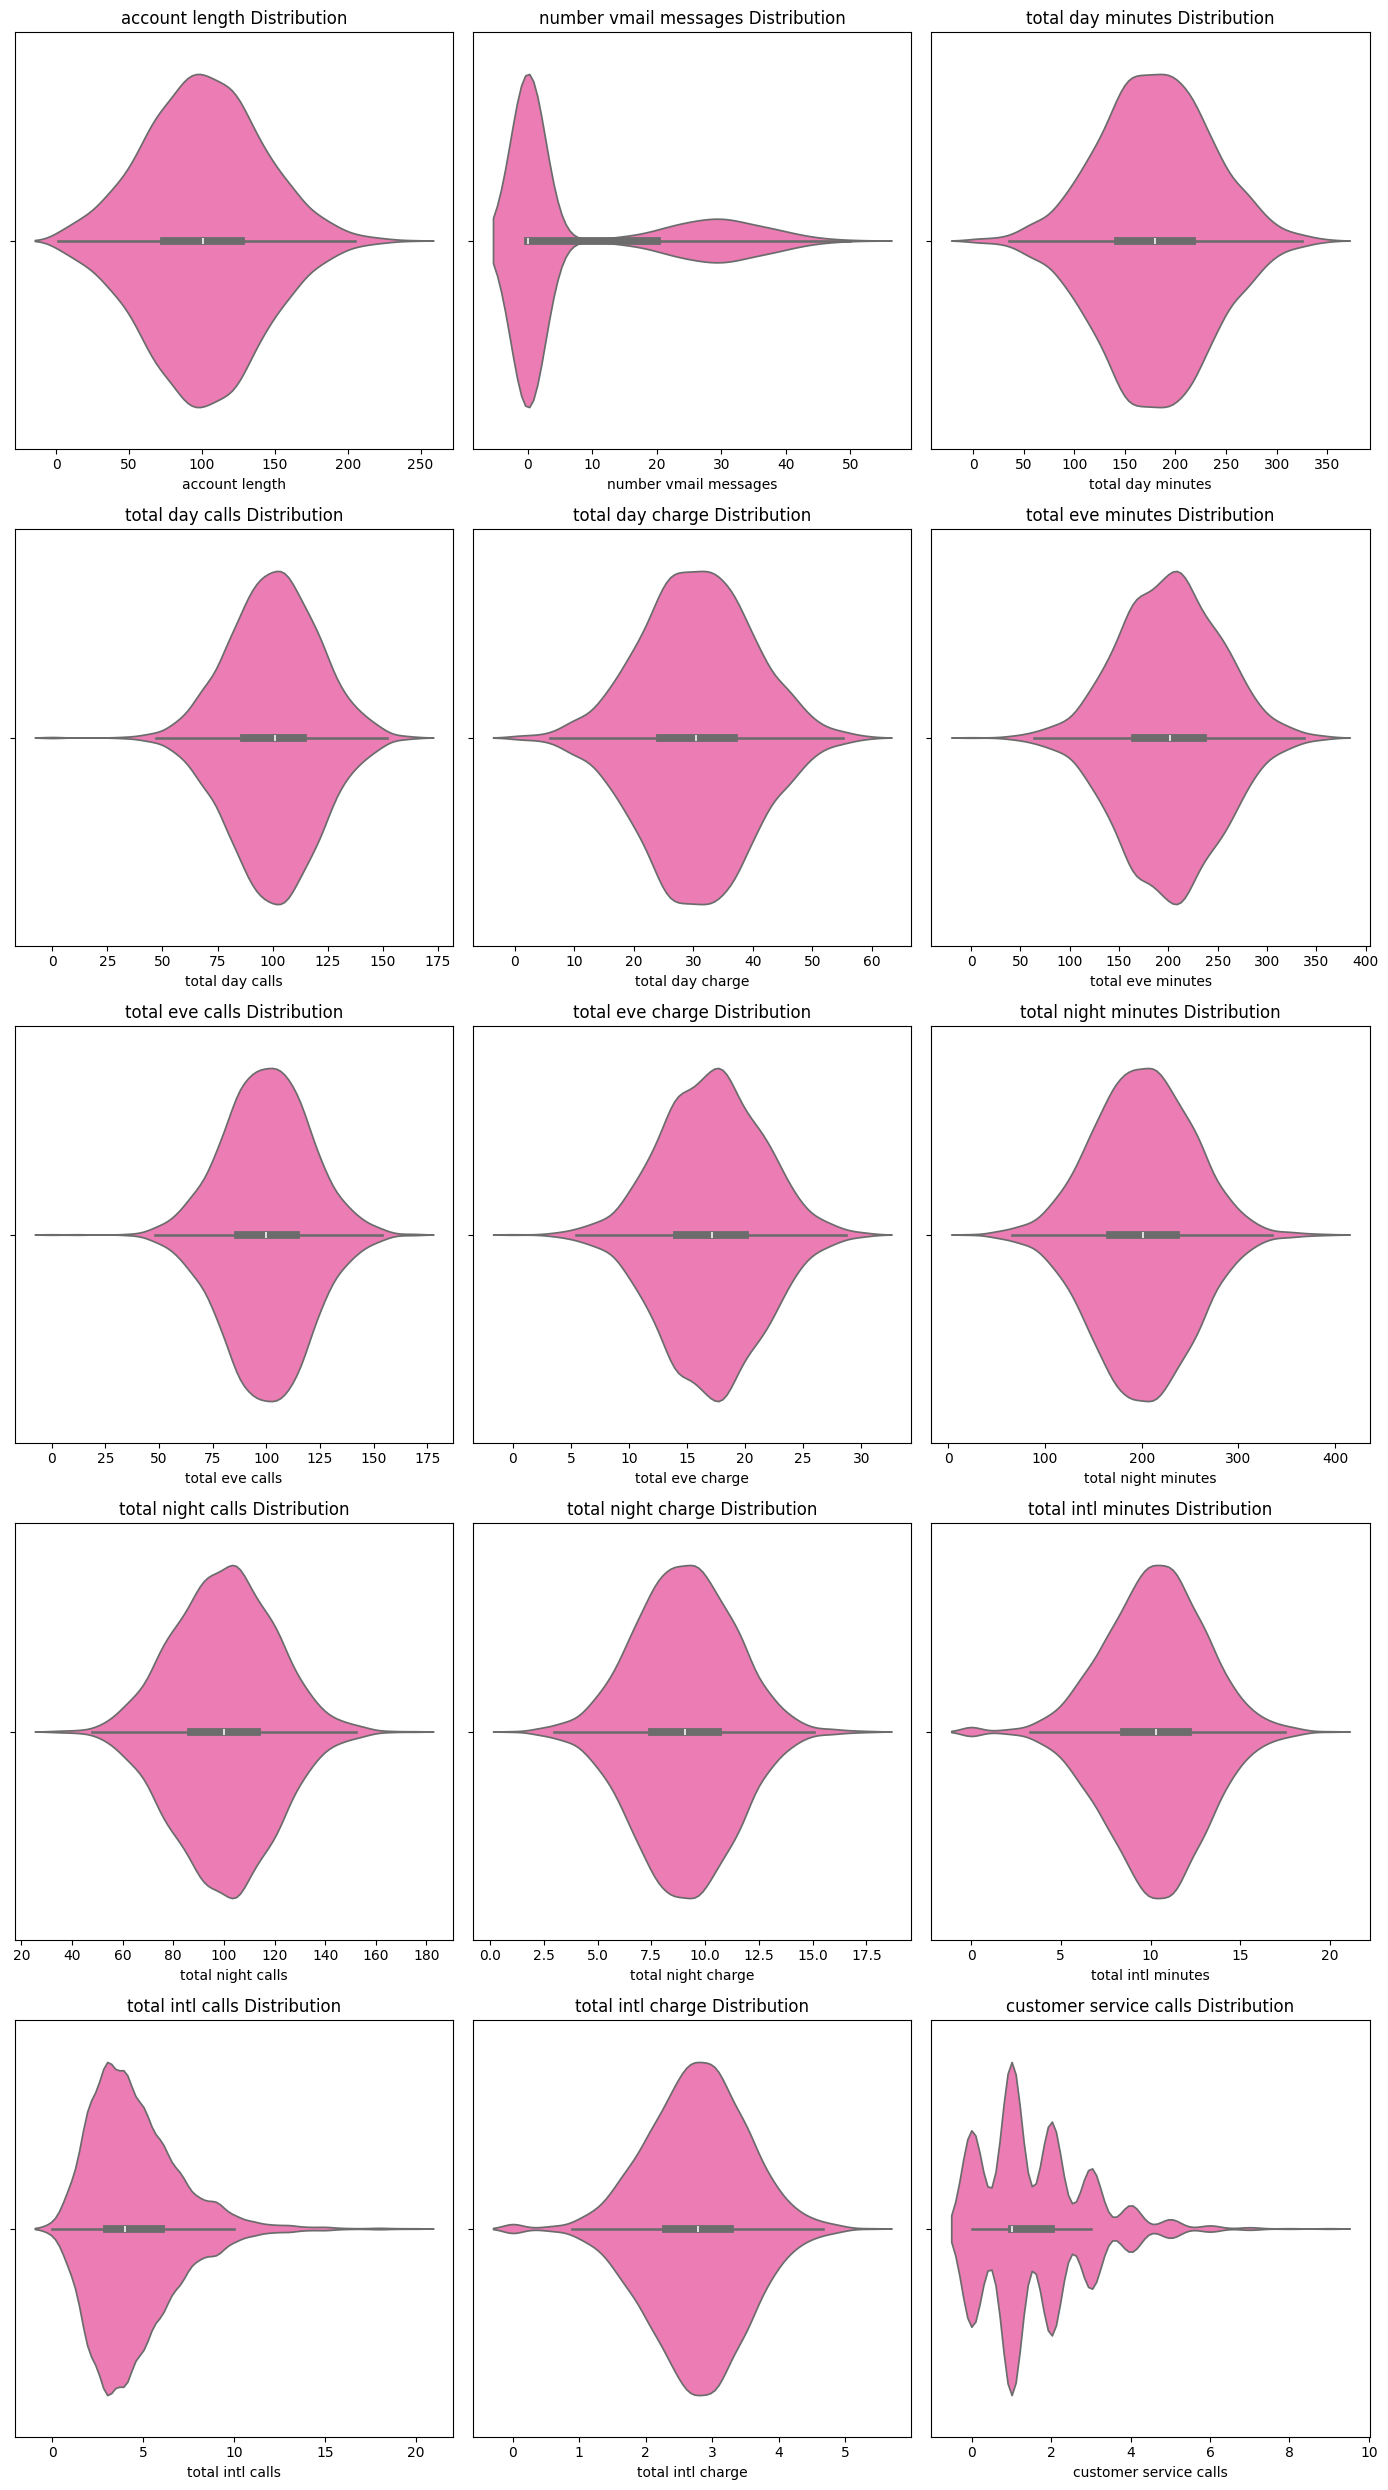

In [91]:
#distribution of numberic columns 

numeric_columns = df.select_dtypes(include="number").columns
cols = 3
rows = int(np.ceil(len(numeric_columns) / cols))

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(14, 5 * rows))
ax_flatten = axs.flatten()

for i, col in enumerate(numeric_columns):
    sns.violinplot(x=df[col], ax=ax_flatten[i], color="hotpink")
    ax_flatten[i].set_title(f"{col} Distribution")



plt.tight_layout()
plt.show()

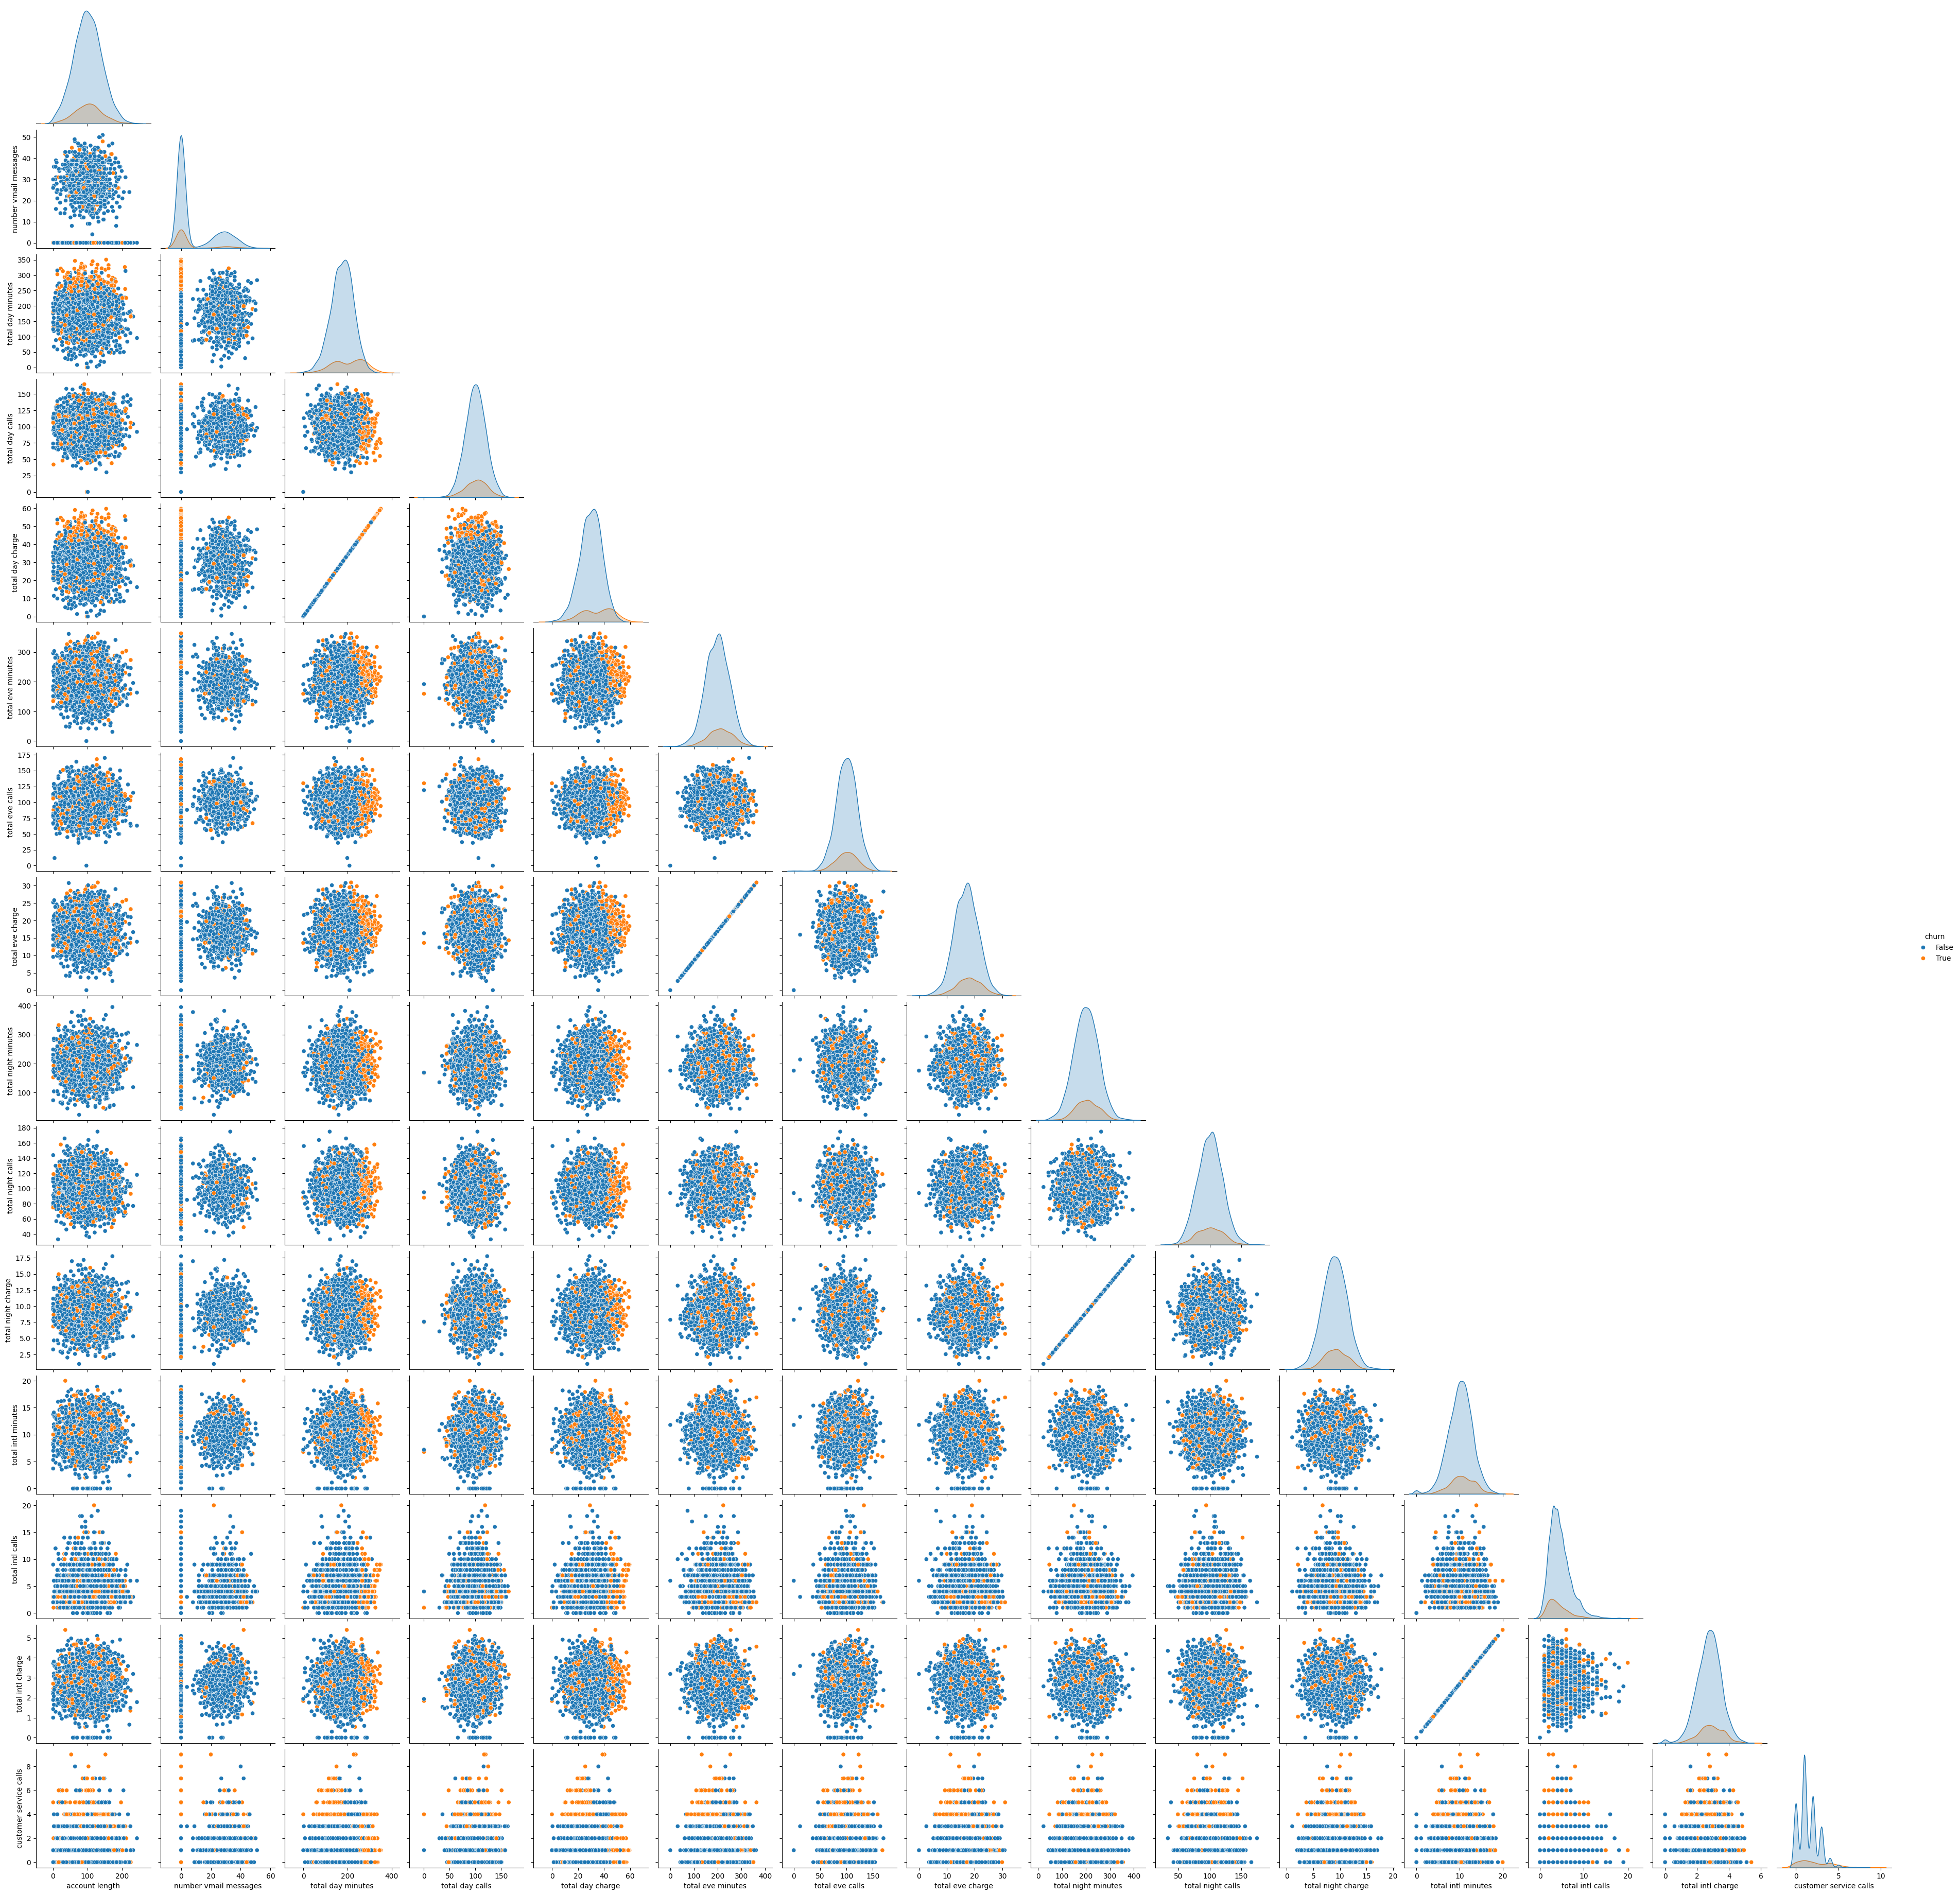

In [113]:
#pair plots

data = df.select_dtypes(exclude="object")
ax = sns.pairplot(data, corner=True, hue="churn" )

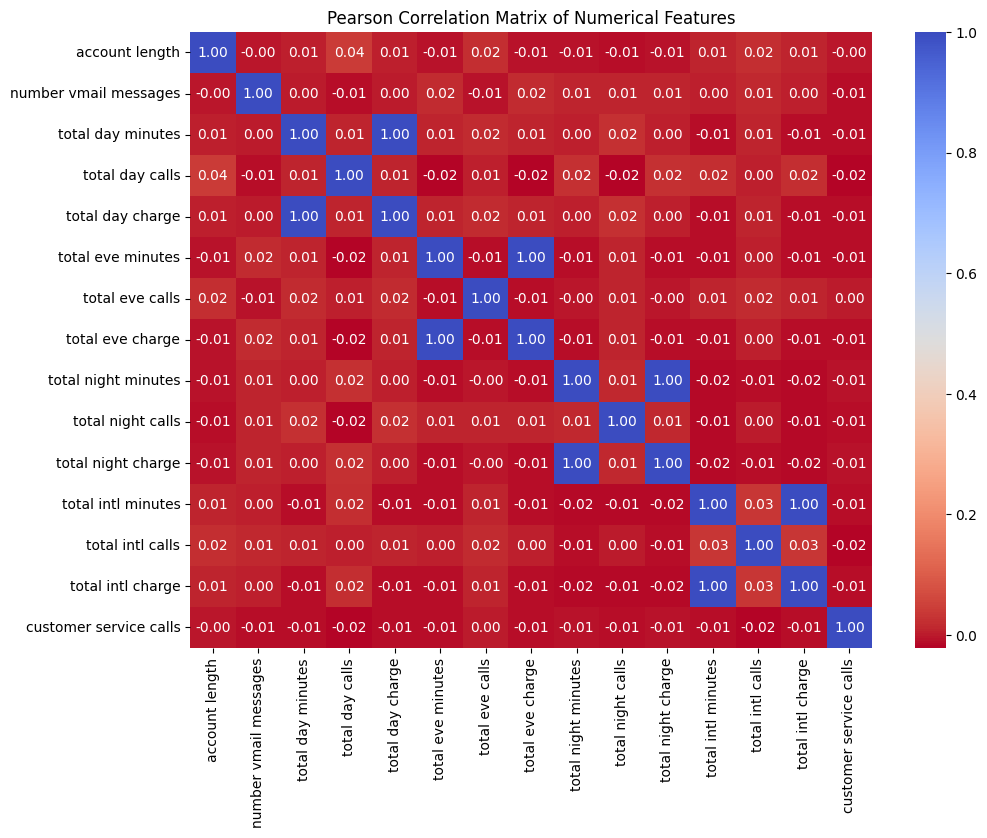

In [ ]:
#Pearson correlation plot

pearson_correlation = df[(df.select_dtypes(include ="number").columns)].corr(method="pearson")

plt.figure(figsize=(11, 12))
sns.heatmap(pearson_correlation, cmap='coolwarm_r', annot=True, fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()